In [52]:
import pandas as pd
import regex as re

attorney = pd.read_csv("attorneys.csv")
att_time = pd.read_csv("AttorneyTimeEntries.csv")
categories = pd.read_csv("categories.csv")
clients = pd.read_csv("clients.csv")
posts = pd.read_csv('questionposts.csv', usecols=range(5), lineterminator='\n')
questions = pd.read_csv("questions.csv")
sites = pd.read_csv("statesites.csv")
subcat = pd.read_csv("subcategories.csv")

/var/folders/yf/fd80q5yj55n0chpzj3btwkt40000gn/T/ipykernel_19104/3200265314.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  posts = pd.read_csv('questionposts.csv', usecols=range(5), lineterminator='\n')


In [53]:
merged = pd.merge(posts, questions, on="QuestionUno")

In [112]:
merged

,Id_x,StateAbbr_x,QuestionUno,PostText,CreatedUtc,Id_y,StateAbbr_y,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline,response,pickup
0,1,AK,B7C95D50-6C81-4E61-BC16-81077B7D3F7E,Do you still need help with this issue? It ha...,2018-04-25 18:09:30,118516,AK,2D43B4FD-FAC8-47C3-A891-085F5D74D64B,Housing and Homelessness,6F28DF84-2BDA-48AE-97F8-A083D20E3EC8,Housing or Property Owned,56A7173F-C8B2-4E17-8189-DBDB8EDDAA1C,2018-04-04 23:15:49,0293D737-A73B-47D8-8D26-FE5AB33F67E1,2018-04-25 18:08:21,0293D737-A73B-47D8-8D26-FE5AB33F67E1,2018-05-05 18:09:47,NaN,10 days 00:01:26,20 days 18:52:32
2,3,AK,F3A78AD3-D3D4-447F-BEAF-F62F1D1D4CCE,"Yes, those are the right forms. I'm sorry, I ...",2018-04-18 17:51:41,118518,AK,A96DEADE-C287-4B31-BFF5-6C02E0640001,Family and Children,372E3CF8-3543-4C71-BA48-DA3F52FC5792,Family/Divorce/Custody,00BB08E8-38C6-42CE-8A01-6C8A1F7F88E7,2018-04-05 23:02:22,C4EA5672-72E4-47CD-A4C2-E4A7C874E40A,2018-04-05 23:11:26,C4EA5672-72E4-47CD-A4C2-E4A7C874E40A,2018-04-18 17:53:16,2018-04-18 00:00:00,12 days 18:41:50,0 days 00:09:04
3,4,AK,5F8506D3-D9F1-48EE-8081-D30259DBF4E8,"Hi ###,You do make some good points. The diff...",2018-04-18 22:15:44,118519,AK,E31B199A-B01E-47E6-86DB-8D99B2BB7420,Other,3DBF3B9F-9ED0-4028-A4FE-0823B0012634,Other,6CB2B648-61A3-425F-9B84-A7C637B83126,2018-04-07 22:49:08,C4EA5672-72E4-47CD-A4C2-E4A7C874E40A,2018-04-09 18:34:20,C4EA5672-72E4-47CD-A4C2-E4A7C874E40A,2018-04-28 22:15:35,NaN,19 days 03:41:15,1 days 19:45:12
5,6,AK,350684F5-99F0-4CC1-81D3-AAE531DDB1DB,I called T-Mobile and asked to get a copy of t...,2018-04-12 20:07:24,118521,AK,E31B199A-B01E-47E6-86DB-8D99B2BB7420,Other,3DBF3B9F-9ED0-4028-A4FE-0823B0012634,Other,2F780A1B-BE83-4A9A-B63F-DC46EA4C8749,2018-04-12 20:07:00,C4EA5672-72E4-47CD-A4C2-E4A7C874E40A,2018-04-18 19:10:51,NaN,2018-04-27 21:36:42,2018-10-25 00:00:00,9 days 02:25:51,5 days 23:03:51
6,7,AK,350684F5-99F0-4CC1-81D3-AAE531DDB1DB,They are correct. Most providers do not save ...,2018-04-18 19:16:42,118521,AK,E31B199A-B01E-47E6-86DB-8D99B2BB7420,Other,3DBF3B9F-9ED0-4028-A4FE-0823B0012634,Other,2F780A1B-BE83-4A9A-B63F-DC46EA4C8749,2018-04-12 20:07:00,C4EA5672-72E4-47CD-A4C2-E4A7C874E40A,2018-04-18 19:10:51,NaN,2018-04-27 21:36:42,2018-10-25 00:00:00,9 days 02:25:51,5 days 23:03:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405529,405560,WY,72E29316-3E1B-4925-B66C-FF68AD92A9CA,Thank you so much!! I appreciate your reply.,2022-01-04 17:37:11,196893,WY,5908F1CF-E396-4A36-B187-1353E2183017,Consumer Financial Questions,998D30DD-A8BE-4B13-B94F-51F3596983C6,Debts & Purchases,C3FCC9BF-E91D-40C0-923C-D0C844DBA722,2022-01-03 23:09:25,36FDE854-14C6-402A-AE2C-16768EC0E07E,2022-01-04 15:14:09,36FDE854-14C6-402A-AE2C-16768EC0E07E,2022-01-14 17:37:48,2022-01-31 00:00:00,10 days 02:23:39,0 days 16:04:44
405530,405561,WY,6F1389B8-6BEC-448D-AA2F-81210CAF15AE,"Hi,My ex-wife, ###, divorced me in ###21. We ...",###,196894,WY,B493CC26-B797-4A33-BEED-7C7146A3300A,Family and Children,7820FAD7-6BDF-47AD-88A2-2DB5C6C6FA70,Family/Divorce/Custody,25A9C766-9531-4E95-8565-1518814D967C,2022-01-04 23:07:34,36FDE854-14C6-402A-AE2C-16768EC0E07E,2022-01-05 17:20:07,36FDE854-14C6-402A-AE2C-16768EC0E07E,2022-01-24 20:17:25,NaN,19 days 02:57:18,0 days 18:12:33
405531,405562,WY,6F1389B8-6BEC-448D-AA2F-81210CAF15AE,"Hi ###,It seems like you basically have two qu...",2022-01-05 17:27:27,196894,WY,B493CC26-B797-4A33-BEED-7C7146A3300A,Family and Children,7820FAD7-6BDF-47AD-88A2-2DB5C6C6FA70,Family/Divorce/Custody,25A9C766-9531-4E95-8565-1518814D967C,2022-01-04 23:07:34,36FDE854-14C6-402A-AE2C-16768EC0E07E,2022-01-05 17:20:07,36FDE854-14C6-402A-AE2C-16768EC0E07E,2022-01-24 20:17:25,NaN,19 days 02:57:18,0 days 18:12:33
405532,405563,WY,C6C77CE7-5603-48B6-B41C-9F2DD0291563,Iâ€™m in the beginning stages of getting a div...,2022-01-07 01:02:48,196895,WY,B493CC26-B797-4A33-BEED-7C7

In [102]:
from datetime import datetime

merged['TakenOnUtc'] = pd.to_datetime(merged['TakenOnUtc'])
merged['ClosedOnUtc'] = pd.to_datetime(merged['ClosedOnUtc'])

merged['response'] = merged['ClosedOnUtc'] - merged['TakenOnUtc']
merged = merged.dropna(subset=['response'])

grouped = merged.groupby('Category')['response'].mean()

print(grouped)

Category
Consumer Financial Questions        11 days 00:39:33.189730046
Education                           10 days 13:07:25.058972198
Family and Children                 10 days 21:10:37.379794352
Health and Disability               17 days 00:01:17.957291175
Housing and Homelessness            10 days 01:20:18.960342465
Income Maintenance                   8 days 22:08:54.923542770
Individual Rights                   11 days 18:35:15.668193766
Juvenile                             7 days 08:17:42.089912280
Other                                9 days 05:10:59.330814575
Work, Employment and Unemployment    9 days 20:28:32.040907891
Name: response, dtype: timedelta64[ns]


In [224]:
import plotly.graph_objs as go
import plotly.express as px

fig1 = go.Bar(x=grouped.index, y=grouped.values / pd.Timedelta(days=1), name = "Response")

In [104]:
merged['AskedOnUtc'] = pd.to_datetime(merged['AskedOnUtc'])

merged['pickup'] = merged['TakenOnUtc'] - merged['AskedOnUtc']
merged = merged.dropna(subset=['pickup'])

grouped2 = merged.groupby('Category')['pickup'].mean()

print(grouped2)

Category
Consumer Financial Questions         6 days 04:03:11.494043427
Education                            9 days 02:52:55.952822241
Family and Children                  7 days 14:56:15.557566236
Health and Disability               10 days 14:43:18.826097215
Housing and Homelessness             6 days 00:41:16.676013698
Income Maintenance                   9 days 13:00:24.577340398
Individual Rights                    7 days 11:52:45.789185129
Juvenile                             8 days 15:56:47.401315789
Other                                6 days 17:16:06.663785804
Work, Employment and Unemployment    7 days 19:27:40.569754552
Name: pickup, dtype: timedelta64[ns]


In [223]:
fig2 = go.Bar(x=grouped2.index, y=grouped2.values / pd.Timedelta(days=1), name = "Pickup")

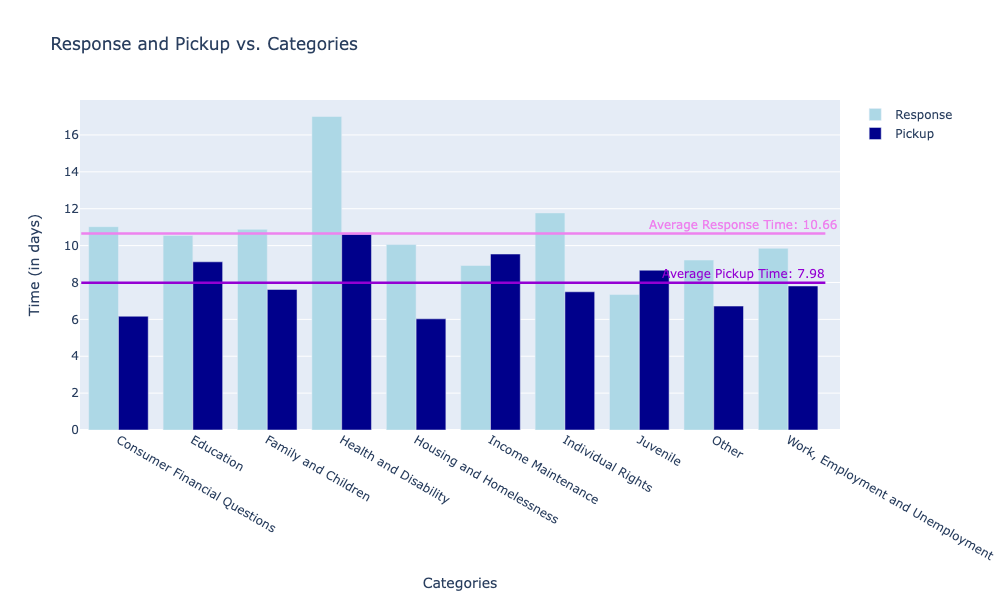

In [402]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=1)

# Add figure 1 to subplot 1
fig.add_trace(fig1.update(marker_color='lightblue'), row=1, col=1)

# Add figure 2 to subplot 1
fig.add_trace(fig2.update(marker_color='darkblue'), row=1, col=1)


avg = np.mean(grouped.values / pd.Timedelta(days=1))
fig.add_shape(
    type='line',
    x0=-0.5,
    y0=avg,
    x1=len(grouped.index)-0.5,
    y1=avg,
    line=dict(color='violet', width=2.5)
)

avg_2 = np.mean(grouped2.values / pd.Timedelta(days=1))
fig.add_shape(
    type='line',
    x0=-0.5,
    y0=avg_2,
    x1=len(grouped2.index)-0.5,
    y1=avg_2,
    line=dict(color='darkviolet', width=2.5)
)

fig.add_annotation(
    x=8.4,
    y=avg+0.5,
    xref="x",
    yref="y",
    text=f"Average Response Time: {avg:.2f}",
    font=dict(color="violet", size=12),
    showarrow=False,
    align="center",
    ax=0,
    ay=-30
)

fig.add_annotation(
    x=8.4,
    y=avg_2+0.5,
    xref="x",
    yref="y",
    text=f"Average Pickup Time: {avg_2:.2f}",
    font=dict(color="darkviolet", size=12),
    showarrow=False,
    align="center",
    ax=0,
    ay=-30
)



fig.update_layout(xaxis_title='Categories', 
                  yaxis_title='Time (in days)',
                  title = "Response and Pickup vs. Categories",
                 showlegend=True,
                 height = 600,
                 width = 700)

# Show the combined figure
fig.show()

In [238]:
merged.loc[(merged.StateAbbr_x == "NV")]

,Id_x,StateAbbr_x,QuestionUno,PostText,CreatedUtc,Id_y,StateAbbr_y,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline,response,pickup


In [239]:
grouped3 = merged.groupby('StateAbbr_x')['response'].mean()

print(grouped3)

StateAbbr_x
AK   30 days 18:34:20.560540873
AL   32 days 13:24:17.882827030
AR   12 days 15:19:22.849677756
AZ    9 days 18:10:52.262473398
CA    9 days 16:26:50.221283783
CT   19 days 06:05:30.557080924
FL    5 days 05:21:44.308125356
GA   11 days 06:35:43.628394333
HI    8 days 15:51:47.637331726
IA   10 days 06:25:19.176573426
IL   18 days 00:40:57.378566406
IN    5 days 02:43:35.195729961
KS   11 days 14:25:38.831683168
LA   15 days 07:16:40.921108982
MA   13 days 00:58:07.263709863
MD    9 days 20:00:29.892489270
ME   11 days 23:25:21.524755597
MI   11 days 08:16:30.088379705
MO    6 days 01:39:13.046940176
MS   17 days 17:28:49.761569789
NC   11 days 01:45:01.841831979
NE   10 days 11:55:00.451184188
NH    9 days 13:43:05.404336734
NJ    7 days 22:27:54.657633243
NM   64 days 21:55:08.711533587
NY   10 days 19:26:58.055109684
OK    7 days 13:59:08.426464391
PA    9 days 18:54:48.864864864
SC    2 days 20:01:24.635885447
SD   13 days 06:13:37.188789652
TN    8 days 19:37:44.846562

In [277]:
fig3 = go.Bar(x=grouped3.index, y=grouped3.values / pd.Timedelta(days=1), name = "Response")

In [317]:
grouped4 = merged.groupby('StateAbbr_x')['pickup'].mean()

print(grouped4)

StateAbbr_x
AK    4 days 09:50:21.839582052
AL   26 days 14:56:33.142591444
AR    6 days 15:06:55.936596411
AZ    2 days 19:52:30.788838969
CA   12 days 08:16:06.890878378
CT    6 days 17:36:40.494580924
FL    2 days 10:58:27.425504273
GA   28 days 11:14:28.646694215
HI    4 days 10:04:49.108499095
IA   14 days 01:55:38.913752913
IL    7 days 09:16:38.507382600
IN   10 days 14:50:31.605558206
KS   12 days 03:06:39.039603960
LA    5 days 13:29:04.944663586
MA    6 days 19:35:21.605266805
MD      12 days 02:54:49.100000
ME    4 days 02:01:25.065384211
MI    4 days 22:00:57.039279869
MO    1 days 19:22:24.353397750
MS   13 days 00:55:09.378008145
NC    7 days 02:51:43.403474903
NE    7 days 22:17:55.916851252
NH    5 days 15:07:04.674426020
NJ    2 days 04:31:20.940379403
NM    3 days 11:21:16.839543726
NY    4 days 02:26:53.223849652
OK    8 days 09:48:16.252142154
PA   14 days 22:03:05.213513513
SC   22 days 17:56:56.634781479
SD    1 days 08:28:56.403141361
TN    5 days 03:40:46.713570

In [278]:
fig4 = go.Bar(x=grouped4.index, y=grouped4.values / pd.Timedelta(days=1), name = "Pickup")

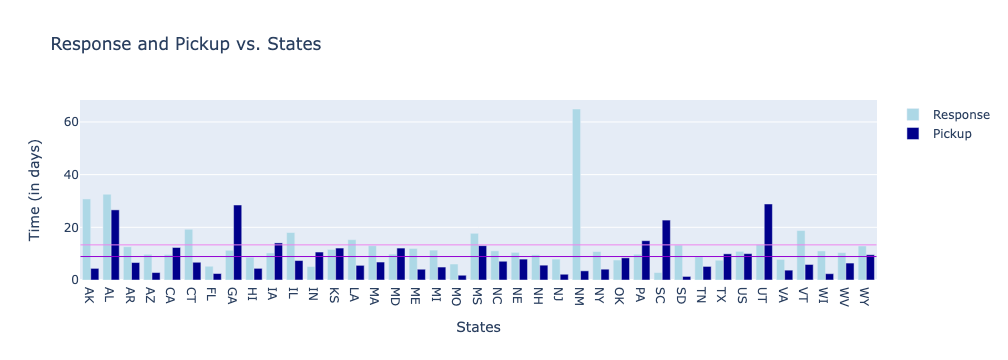

In [279]:
from plotly.subplots import make_subplots
fig_b = make_subplots(rows=1, cols=1)

# Add figure 1 to subplot 1
fig_b.add_trace(fig3.update(marker_color='lightblue'), row=1, col=1)

# Add figure 2 to subplot 1
fig_b.add_trace(fig4.update(marker_color='darkblue'), row=1, col=1)


fig_b.update_layout(xaxis_title='States', 
                  yaxis_title='Time (in days)',
                  title = "Response and Pickup vs. States",
                 showlegend=True)

avg_3 = np.mean(grouped3.values / pd.Timedelta(days=1))
fig_b.add_shape(
    type='line',
    x0=-0.5,
    y0=avg_3,
    x1=len(grouped3.index)-0.5,
    y1=avg_3,
    line=dict(color='violet', width=1)
)

avg_4 = np.mean(grouped4.values / pd.Timedelta(days=1))
fig_b.add_shape(
    type='line',
    x0=-0.5,
    y0=avg_4,
    x1=len(grouped4.index)-0.5,
    y1=avg_4,
    line=dict(color='darkviolet', width=1)
)


# Show the combined figure
fig_b.show()

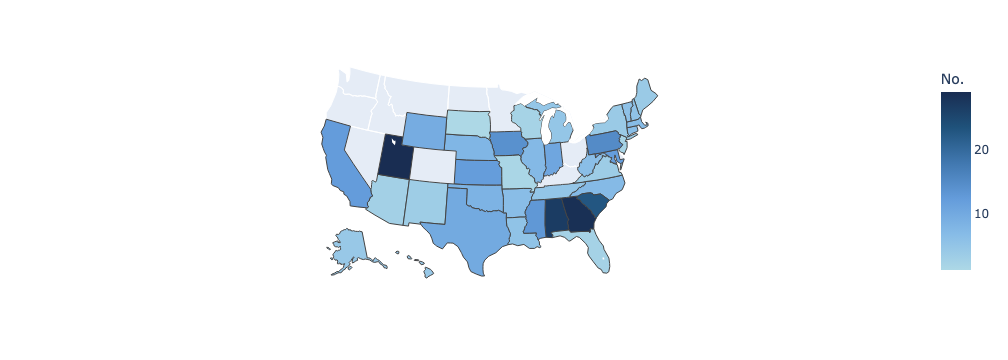

In [353]:
import plotly.express as px
import pandas as pd
from datetime import timedelta

# Example data: a DataFrame with state abbreviations and values
# Replace this with your actual data



response_time = pd.DataFrame({
    'state': grouped4.index,
    'No.': grouped4.values.astype('timedelta64[s]').astype(int)/86400


})

custom_color_scale = [[0.0, '#ADD8E6'],
                      [0.2, '#87BCE7'],
                      [0.4, '#649CDB'],
                      [0.6, '#4178B0'],
                      [0.8, '#1F527B'],
                      [1.0, '#192D52']]


# Create a choropleth map of the United States using Plotly Express
fig5 = px.choropleth(
    response_time,
    locations='state',  # Column containing state abbreviations
    color='No.',  # Column containing values
    locationmode='USA-states',  # Specify the location mode as US states
    scope='usa',  # Limit the map scope to the USA
    color_continuous_scale=custom_color_scale  # Specify the title of the map
)

# Show the map
fig5.show()



In [322]:
td

30009783745012430

In [290]:
merged.loc[(merged.StateAbbr_x == "SC")].groupby("Category")['response'].mean()

Category
Consumer Financial Questions        4 days 01:18:12.975016880
Education                           0 days 23:18:32.923076923
Family and Children                 1 days 12:43:07.036814288
Health and Disability               1 days 10:47:45.987878787
Housing and Homelessness            4 days 01:14:22.882841823
Income Maintenance                  3 days 03:19:39.211180124
Individual Rights                   3 days 13:21:49.272727272
Other                               2 days 20:46:09.766123982
Work, Employment and Unemployment   3 days 23:23:36.927983539
Name: response, dtype: timedelta64[ns]

In [274]:
merged.loc[(merged.StateAbbr_x == "SC")].groupby("Category")['pickup'].mean()

Category
Consumer Financial Questions        14 days 10:21:14.380823767
Education                           18 days 15:54:24.083916084
Family and Children                 26 days 18:46:47.614178968
Health and Disability               31 days 12:24:58.533333333
Housing and Homelessness            20 days 03:53:19.121447721
Income Maintenance                  23 days 17:26:41.223602484
Individual Rights                   21 days 15:02:29.984848484
Other                               19 days 19:12:48.093299937
Work, Employment and Unemployment   31 days 06:40:19.640946502
Name: pickup, dtype: timedelta64[ns]

In [275]:
merged.loc[(merged.StateAbbr_x == "AL")].groupby("Category")['response'].mean()

Category
Consumer Financial Questions         10 days 18:29:41.069444444
Education                                5 days 12:12:01.500000
Family and Children                  14 days 15:09:16.341692790
Health and Disability               277 days 03:47:03.453781512
Housing and Homelessness             14 days 02:02:40.156583630
Income Maintenance                   11 days 05:02:36.538461538
Individual Rights                       11 days 05:21:23.453125
Juvenile                                       10 days 00:04:30
Other                                 9 days 01:01:07.259109311
Work, Employment and Unemployment    15 days 23:29:20.227272727
Name: response, dtype: timedelta64[ns]

In [282]:
merged.loc[(merged.StateAbbr_x == "AL")].groupby("Category")['pickup'].mean()

Category
Consumer Financial Questions        26 days 01:20:32.159722222
Education                                     15 days 02:13:35
Family and Children                 26 days 13:56:55.092476489
Health and Disability               20 days 08:47:46.705882353
Housing and Homelessness            29 days 06:02:53.861209964
Income Maintenance                  36 days 17:37:49.730769231
Individual Rights                      32 days 17:39:05.500000
Juvenile                                      44 days 09:22:13
Other                               25 days 15:21:34.004048583
Work, Employment and Unemployment             23 days 08:36:47
Name: pickup, dtype: timedelta64[ns]

In [297]:
grouped5 = merged.groupby(merged['CreatedUtc'].str[:4])['response'].mean()

print(grouped5)

CreatedUtc
\t\t'#             0 days 00:28:56
\t                10 days 02:13:07
                   6 days 07:17:54
         9 days 01:30:00.733333333
   #        5 days 18:31:00.500000
                    ...           
yet                1 days 21:43:16
you         4 days 00:22:11.800000
â€      5 days 22:09:50.666666666
â€¦â               0 days 01:19:18
â€™               11 days 00:44:07
Name: response, Length: 2101, dtype: timedelta64[ns]


In [293]:
merged['CreatedUtc'].str[:4]

0         2018
2         2018
3         2018
5         2018
6         2018
          ... 
405529    2022
405530     ###
405531    2022
405532    2022
405533    2022
Name: CreatedUtc, Length: 358829, dtype: object